# Month of most sighting 
In this code the months were examined to view trends of months that had most sighting. 
The initial code was taken from the clean data file that is was imported. 
After analyzing the data, the Summer season which includes traditionally June, July and August had the most sightings after binning the states into specific geographical regions.


In [58]:
import requests
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import json
import time
import hvplot.pandas
import scipy.stats as stats

# Turn off warning messages
import warnings
warnings.filterwarnings("ignore")

In [59]:
# Read the CSV file
df = pd.read_csv("../Data/clean_UFO.csv")

#View the first 5 rows 
df.head()

,Date_time,city,state/province,country,UFO_shape,length_of_encounter_seconds,description,latitude,longitude,year,month,is_weekend
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700.0,This event took place in early fall around 194...,29.883056,-97.941111,1949,10,False
1,1956-10-10 21:00:00,edna,tx,us,circle,20.0,My older brother and twin sister were leaving ...,28.978333,-96.645833,1956,10,False
2,1960-10-10 20:00:00,kaneohe,hi,us,light,900.0,AS a Marine 1st Lt. flying an FJ4B fighter/att...,21.418056,-157.803611,1960,10,False
3,1961-10-10 19:00:00,bristol,tn,us,sphere,300.0,My father is now 89 my brother 52 the girl wit...,36.595000,-82.188889,1961,10,False
4,1965-10-10 23:45:00,norwalk,ct,us,disk,1200.0,A bright orange color changing to reddish colo...,41.117500,-73.408333,1965,10,True


In [60]:
df.nunique()

Date_time                      55652
city                           11235
state/province                    52
country                            1
UFO_shape                         19
length_of_encounter_seconds      460
description                    63321
latitude                       11495
longitude                      12293
year                              83
month                             12
is_weekend                         2
dtype: int64

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63553 entries, 0 to 63552
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date_time                    63553 non-null  object 
 1   city                         63553 non-null  object 
 2   state/province               63553 non-null  object 
 3   country                      63553 non-null  object 
 4   UFO_shape                    63553 non-null  object 
 5   length_of_encounter_seconds  63553 non-null  float64
 6   description                  63553 non-null  object 
 7   latitude                     63553 non-null  float64
 8   longitude                    63553 non-null  float64
 9   year                         63553 non-null  int64  
 10  month                        63553 non-null  int64  
 11  is_weekend                   63553 non-null  bool   
dtypes: bool(1), float64(3), int64(2), object(6)
memory usage: 5.4+ MB


In [62]:
# dropping columns 
df_city = df.drop (['Date_time'],axis=1)
df_city

,city,state/province,country,UFO_shape,length_of_encounter_seconds,description,latitude,longitude,year,month,is_weekend
0,san marcos,tx,us,cylinder,2700.0,This event took place in early fall around 194...,29.883056,-97.941111,1949,10,False
1,edna,tx,us,circle,20.0,My older brother and twin sister were leaving ...,28.978333,-96.645833,1956,10,False
2,kaneohe,hi,us,light,900.0,AS a Marine 1st Lt. flying an FJ4B fighter/att...,21.418056,-157.803611,1960,10,False
3,bristol,tn,us,sphere,300.0,My father is now 89 my brother 52 the girl wit...,36.595000,-82.188889,1961,10,False
4,norwalk,ct,us,disk,1200.0,A bright orange color changing to reddish colo...,41.117500,-73.408333,1965,10,True
...,...,...,...,...,...,...,...,...,...,...,...
63548,nashville,tn,us,light,600.0,Round from the distance/slowly changing colors...,36.165833,-86.784444,2013,9,False
63549,boise,id,us,circle,1200.0,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,43.613611,-116.202500,2013,9,False
63550,napa,ca,us,other,1200.0,Napa UFO&#44,38.297222,-122.284444,2013,9,False
63551,vienna,va,us,circle,5.0,Saw a five gold lit cicular craft moving fastl...,38.901111,-77.265556,2013,9,False


In [63]:
# view the value counts of the UFO_shape column 
df[['UFO_shape']].value_counts(ascending=False)

UFO_shape
light        13471
other         9035
triangle      6555
circle        6119
fireball      5149
sphere        4346
disk          4121
oval          3030
formation     1990
cigar         1643
changing      1585
teardrop      1173
rectangle     1070
flash         1062
cylinder      1026
diamond        928
chevron        815
cone           247
cross          188
dtype: int64

In [64]:
# Look at the length of the UFO shape "light"
len(df[df.UFO_shape== 'light'])

13471

In [65]:
# remove columns , country, Date_time, UFO_shape, length of encounter , discription ,year, month and is weekend 
df_city = df.drop (['country','Date_time','UFO_shape','length_of_encounter_seconds','description','year','month','is_weekend'],axis=1)
df_city.value_counts()

city                                                       state/province  latitude   longitude  
seattle                                                    wa              47.606389  -122.330833    471
phoenix                                                    az              33.448333  -112.073333    434
las vegas                                                  nv              36.175000  -115.136389    352
los angeles                                                ca              34.052222  -118.242778    347
san diego                                                  ca              32.715278  -117.156389    327
                                                                                                    ... 
middlefield (on county line&#44 geauga_trumbull counties)  oh              41.461944  -81.073889       1
middlefield                                                oh              41.461944  -81.073889       1
middlebury                                                 vt 

In [66]:
# List the states under the 'state/province' sine the data set is referencing US only 
state_list = sorted(df_city['state/province'].unique().tolist())
print(state_list)

['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'pr', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


In [67]:
# defining US region groupings, and making a new column for "region"
southwest = ['az','tx','nm','ok']
southeast = ['al','ar','la','ms','tn','ky','wv','va','nc','sc','ga','fl']
northeast = ['me','nh','vt','ma','md','ri','ct','nj','de','pa','ny']
middle_west = ['nd','sd','ne','ks','mn','ia','mo','wi','il','mi','in','oh']
west = ['wa', 'mt', 'or', 'id', 'wy', 'co', 'nm', 'ca', 'az', 'nv', 'ut', 'ak', 'hi']
df["region"] = None

df.loc[df["state/province"].isin(southwest), "region"] = "Southwest"
df.loc[df["state/province"].isin(southeast), "region"] = "Southeast"
df.loc[df["state/province"].isin(northeast), "region"] = "Northeast"
df.loc[df["state/province"].isin(middle_west), "region"] = "Middle West"
df.loc[df["state/province"].isin(west), "region"] = "West"

In [68]:
# look at counts per region
df.region.value_counts()

West           21591
Southeast      13439
Middle West    13320
Northeast      11060
Southwest       4112
Name: region, dtype: int64

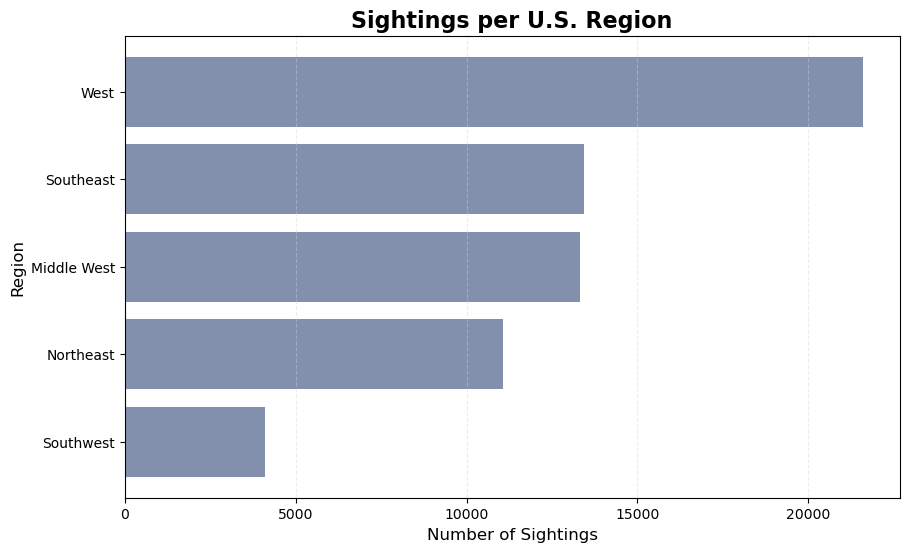

In [69]:
# Make a bar chart for number of sightings per Region
regions = ["West", "Southeast", "Middle West", "Northeast", "Southwest"]
sightings_count = df.region.value_counts().iloc[::-1]

# init the plot
plt.figure(figsize=(10,6))
plt.barh(sightings_count.index, sightings_count.values, color='#09225d', alpha=0.5, align="center")

# customize the plot
plt.title("Sightings per U.S. Region", fontsize=16, fontweight="bold")
plt.xlabel("Number of Sightings", fontsize=12)
plt.ylabel("Region", fontsize=12)

plt.grid(axis="x", c="lightgray", linestyle="dashed", alpha=0.4)

# show the plot
plt.show()

In [70]:
year_list = sorted(df['year'].unique().tolist())
print(year_list)

[1910, 1920, 1925, 1929, 1931, 1934, 1936, 1937, 1939, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014]


In [71]:
# Create the bins for sightings by decades
bins = [0, 1959, 1969, 1979, 1989, 1999, 2009, 2019]

# Create the names for the five bins
group_labels = ["pre-1960s", "1960s", "1970s", "1980s", "1990s", "2000s", "2010s"]

In [72]:
# Slice the data and place it into bins
pd.cut(df["year"], bins, labels=group_labels).value_counts()

2000s        30158
2010s        22014
1990s         6500
1970s         1823
1980s         1588
1960s         1045
pre-1960s      425
Name: year, dtype: int64

In [73]:
# Place the decade data into a new column inside of the DataFrame
df["decades"] = pd.cut(df["year"], bins, labels=group_labels)
df.head()

,Date_time,city,state/province,country,UFO_shape,length_of_encounter_seconds,description,latitude,longitude,year,month,is_weekend,region,decades
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700.0,This event took place in early fall around 194...,29.883056,-97.941111,1949,10,False,Southwest,pre-1960s
1,1956-10-10 21:00:00,edna,tx,us,circle,20.0,My older brother and twin sister were leaving ...,28.978333,-96.645833,1956,10,False,Southwest,pre-1960s
2,1960-10-10 20:00:00,kaneohe,hi,us,light,900.0,AS a Marine 1st Lt. flying an FJ4B fighter/att...,21.418056,-157.803611,1960,10,False,West,1960s
3,1961-10-10 19:00:00,bristol,tn,us,sphere,300.0,My father is now 89 my brother 52 the girl wit...,36.595000,-82.188889,1961,10,False,Southeast,1960s
4,1965-10-10 23:45:00,norwalk,ct,us,disk,1200.0,A bright orange color changing to reddish colo...,41.117500,-73.408333,1965,10,True,Northeast,1960s


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63553 entries, 0 to 63552
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Date_time                    63553 non-null  object  
 1   city                         63553 non-null  object  
 2   state/province               63553 non-null  object  
 3   country                      63553 non-null  object  
 4   UFO_shape                    63553 non-null  object  
 5   length_of_encounter_seconds  63553 non-null  float64 
 6   description                  63553 non-null  object  
 7   latitude                     63553 non-null  float64 
 8   longitude                    63553 non-null  float64 
 9   year                         63553 non-null  int64   
 10  month                        63553 non-null  int64   
 11  is_weekend                   63553 non-null  bool    
 12  region                       63522 non-null  object  
 13  d

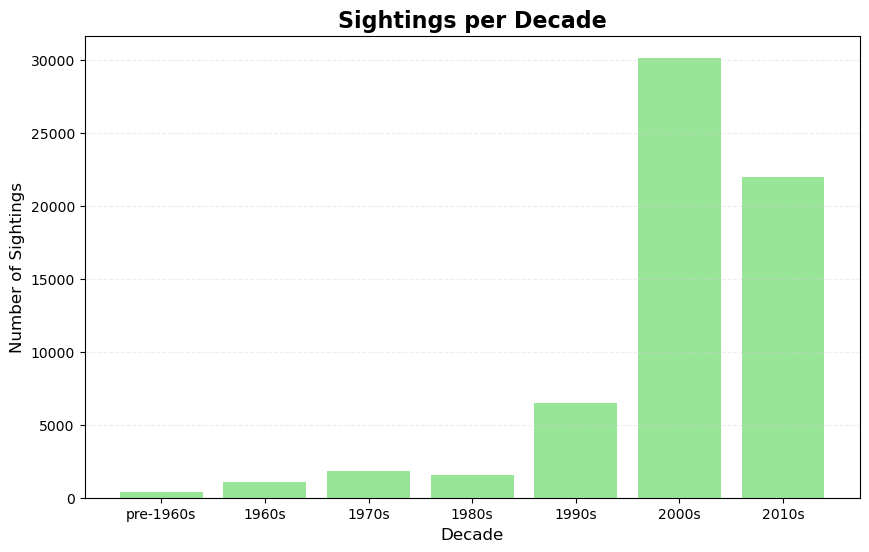

In [75]:
# Bar chart for number of sightings per decade
# create a new dataframe for the desired data
decades_count_df = df.groupby("decades")["year"].count().reset_index()

# init the plot
plt.figure(figsize=(10,6))
plt.bar(decades_count_df.decades, decades_count_df.year, color="limegreen", alpha=0.5, align="center")

# customize the plot
plt.title("Sightings per Decade", fontsize=16, fontweight="bold")
plt.xlabel("Decade", fontsize=12)
plt.ylabel("Number of Sightings", fontsize=12)

plt.grid(axis="y", c="lightgray", linestyle="dashed", alpha=0.4)

# save the bar chart
plt.savefig("sightings_per_decade_bar.png")

# show the plot
plt.show()

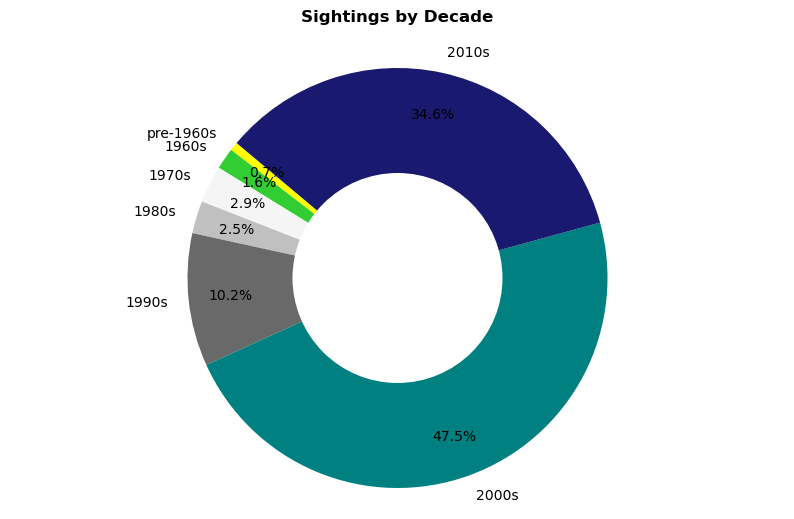

In [76]:
# Donut chart to look at sightings per decade in a proportionate way
# configure the chart
plt.figure(figsize=(10,6))
plt.pie(decades_count_df.year,
        labels=decades_count_df.decades,
        autopct="%1.1f%%",
        colors=["yellow", "limegreen","whitesmoke","silver","dimgrey","teal","midnightblue"],
        pctdistance=0.80,
        startangle=140)

# draw the chart
centre_circle = plt.Circle((0, 0), 0.5, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title("Sightings by Decade\n", fontweight="bold")
plt.axis("equal")

# save the donut chart
plt.savefig("sightings_per_decade_donut.png")

# show the donut chart
plt.show()

In [77]:
df.info(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63553 entries, 0 to 63552
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Date_time                    63553 non-null  object  
 1   city                         63553 non-null  object  
 2   state/province               63553 non-null  object  
 3   country                      63553 non-null  object  
 4   UFO_shape                    63553 non-null  object  
 5   length_of_encounter_seconds  63553 non-null  float64 
 6   description                  63553 non-null  object  
 7   latitude                     63553 non-null  float64 
 8   longitude                    63553 non-null  float64 
 9   year                         63553 non-null  int64   
 10  month                        63553 non-null  int64   
 11  is_weekend                   63553 non-null  bool    
 12  region                       63522 non-null  object  
 13  d

In [78]:
# rename column state/province to remove the forward slash 
df=df.rename(columns = {'state/province': 'state_province'})
df.head()

,Date_time,city,state_province,country,UFO_shape,length_of_encounter_seconds,description,latitude,longitude,year,month,is_weekend,region,decades
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700.0,This event took place in early fall around 194...,29.883056,-97.941111,1949,10,False,Southwest,pre-1960s
1,1956-10-10 21:00:00,edna,tx,us,circle,20.0,My older brother and twin sister were leaving ...,28.978333,-96.645833,1956,10,False,Southwest,pre-1960s
2,1960-10-10 20:00:00,kaneohe,hi,us,light,900.0,AS a Marine 1st Lt. flying an FJ4B fighter/att...,21.418056,-157.803611,1960,10,False,West,1960s
3,1961-10-10 19:00:00,bristol,tn,us,sphere,300.0,My father is now 89 my brother 52 the girl wit...,36.595000,-82.188889,1961,10,False,Southeast,1960s
4,1965-10-10 23:45:00,norwalk,ct,us,disk,1200.0,A bright orange color changing to reddish colo...,41.117500,-73.408333,1965,10,True,Northeast,1960s


In [79]:
# view the ufo shape and region data in ascending order 
df[['UFO_shape','region']].value_counts(ascending=False)

UFO_shape  region     
light      West           4822
other      West           3045
light      Middle West    2849
           Southeast      2736
           Northeast      2208
                          ... 
cross      Southeast        43
           Middle West      36
           Northeast        30
cone       Southwest        14
cross      Southwest        12
Length: 95, dtype: int64

In [80]:
# view the shape light length 
len(df[df.UFO_shape== 'light'])

13471

In [81]:
# df  to identify which city has most sightings on weekend and which shape 
df1 = df [['is_weekend','city','UFO_shape']].copy()
df1

,is_weekend,city,UFO_shape
0,False,san marcos,cylinder
1,False,edna,circle
2,False,kaneohe,light
3,False,bristol,sphere
4,True,norwalk,disk
...,...,...,...
63548,False,nashville,light
63549,False,boise,circle
63550,False,napa,other
63551,False,vienna,circle


In [82]:
#value count of df for weekend , city UFO shape
df1.value_counts(ascending=False)


is_weekend  city       UFO_shape
False       seattle    light        80
            phoenix    light        76
            portland   light        59
            san diego  light        58
            seattle    other        51
                                    ..
            needville  light         1
                       fireball      1
            needles    formation     1
            nederland  light         1
True        zumbrota   other         1
Length: 38495, dtype: int64

In [83]:
df1.nunique()

is_weekend        2
city          11235
UFO_shape        19
dtype: int64

In [84]:
# df to find which month, state,region with most sightings 
df2= df [['state_province','month','region']].copy()
df2

,state_province,month,region
0,tx,10,Southwest
1,tx,10,Southwest
2,hi,10,West
3,tn,10,Southeast
4,ct,10,Northeast
...,...,...,...
63548,tn,9,Southeast
63549,id,9,West
63550,ca,9,West
63551,va,9,Southeast


In [85]:
# value count of df2 for state, month and region 
df2.value_counts()

state_province  month  region     
ca              8      West           879
                7      West           867
                6      West           827
                11     West           793
                9      West           754
                                     ... 
nd              5      Middle West      6
                12     Middle West      6
wy              3      West             3
nd              3      Middle West      2
                2      Middle West      2
Length: 600, dtype: int64

In [86]:
# determine which months/season have the most sightings
df2.month.value_counts()

7     7523
8     6672
6     6288
10    6111
9     6050
11    5520
12    4509
1     4455
3     4315
4     4306
5     4129
2     3675
Name: month, dtype: int64

In [87]:
# Month and region sorted with most sighting 
df2.groupby('month')['region'].count().reset_index()

,month,region
0,1,4451
1,2,3675
2,3,4314
3,4,4303
4,5,4128
5,6,6279
6,7,7519
7,8,6670
8,9,6048
9,10,6110


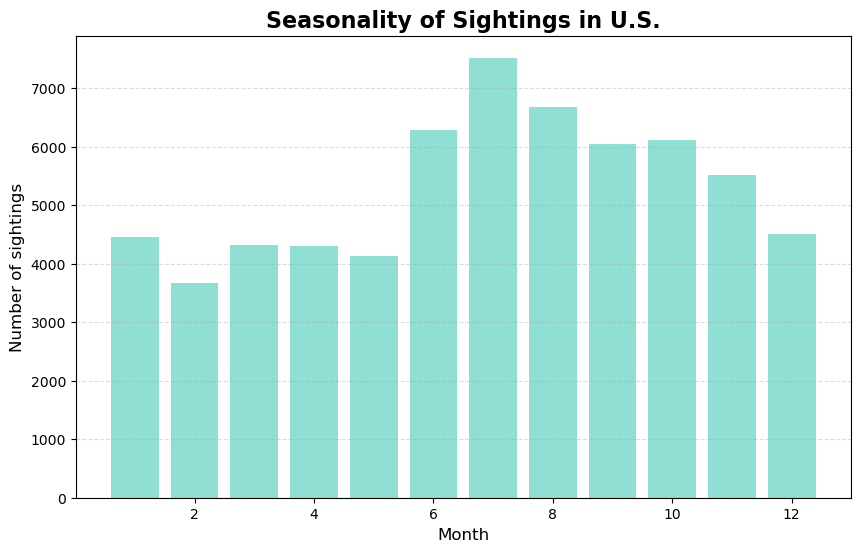

In [88]:
# Bar chart for Month/season of most sightings 

months = ['February','May','April','March','January','December','November','September','October','June','August','July']
month_count = df2.month.value_counts()

# # init the plot
plt.figure(figsize=(10,6))
plt.bar(month_count.index,month_count.values, color='#21c0ab', alpha=0.5, align="center")


#customize the plot

plt.title("Seasonality of Sightings in U.S.", fontsize=16, fontweight="bold")
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of sightings", fontsize=12)

plt.grid(axis="y", c="darkgray", linestyle="dashed", alpha=0.4)

plt.savefig('Seasonality_of_Sightings.png')

# show the plot
plt.show()